In [39]:
import time
import numpy as np
from molNet.utils.smiles.generator import generate_n_random_hetero_carbon_lattice
from molNet.utils.parallelization.multiprocessing import solve_cores
from molNet import MOLNET_LOGGER
from multiprocessing import Pool
from tqdm import tqdm
from molNet.featurizer._autogen_molecule_featurizer import MolWtFeaturizer
from IPython.display import clear_output
import matplotlib.pyplot as plt

from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [33]:
smiles = np.array([k for k in generate_n_random_hetero_carbon_lattice(n=1_000, max_c=10)])

100%|██████████| 1000/1000 [00:00<00:00, 1971.61 mol/s]


In [34]:
max_split=100
progess_bar=True
gen_args=[]
gen_kwargs={}
progress_bar_kwargs={}
featurizer_class=MolWtFeaturizer
data=[(s, gen_args, gen_kwargs, featurizer_class) for s in smiles]
from cdf_h import func

In [44]:
data = np.array(data)
cores = solve_cores("all-1")
MOLNET_LOGGER.debug(f"using {cores} cores")
sub_data = np.array_split(data, len(data) / 100)

len(sub_data),cores

(10, 7)

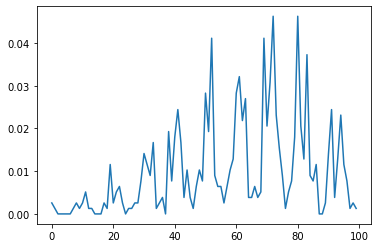

100%|██████████| 1000/1000 [00:27<00:00, 36.49it/s]


False
False


In [47]:
r = []
bins=100
xmin,xmax=np.inf,-np.inf
x=np.linspace(xmin,xmax,bins)
hist=np.array([0])
prehist=np.array([1])
with Pool(cores) as p:
    if progess_bar:
        with tqdm(total=len(data), **progress_bar_kwargs) as pbar:
            for ri in p.imap(func, sub_data):
                lri=len(ri)
                ri=ri[~np.isnan(ri)]
                rimax,rimin=ri.max(),ri.min()
                change=False
                if rimin<xmin:
                    xmin=rimin
                    change=True
                if rimax>xmax:
                    xmax=rimax
                    change=True
                prehist=hist.copy()
                if change:
                    print(xmin,xmax)
                    x=np.linspace(xmin,xmax,bins)
                    npr=np.array(r).flatten()
                    hist,bin_edges = np.histogram(npr,range=(xmin,xmax),bins=bins)
                rhist,rbin_edges = np.histogram(ri,range=(xmin,xmax),bins=bins)
                hist+=rhist

                r.extend(ri)

                if change:
                    plt.plot(hist/hist.sum())
                    clear_output(wait=True)
                    plt.show()
                    plt.close()
                else:
                    print(np.allclose(prehist,hist))
                pbar.update(lri)

    else:
        for ri in p.imap(func, sub_data):
            r.extend(ri)

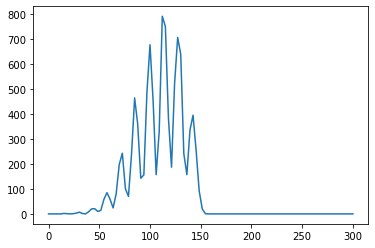

In [32]:
npr=np.array(r).flatten()
range=(npr.min(), npr.max())
bins=100
xmin,ymin=0,300
x=np.linspace(xmin,ymin,bins)
hist,bin_edges = np.histogram(npr,range=(xmin,ymin),bins=bins)
plt.plot(x,hist)

In [ ]:
bin_edges

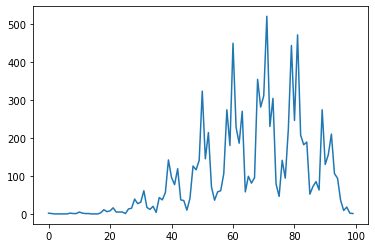